In [1]:
# import sys
# sys.path.append('../')

# from qiskit_utilities.mixers import *
from mixers import *

In [2]:
from IPython.display import display
np.set_printoptions(suppress=True)

In [3]:
import matplotlib.pyplot as pl
import tikzplotlib

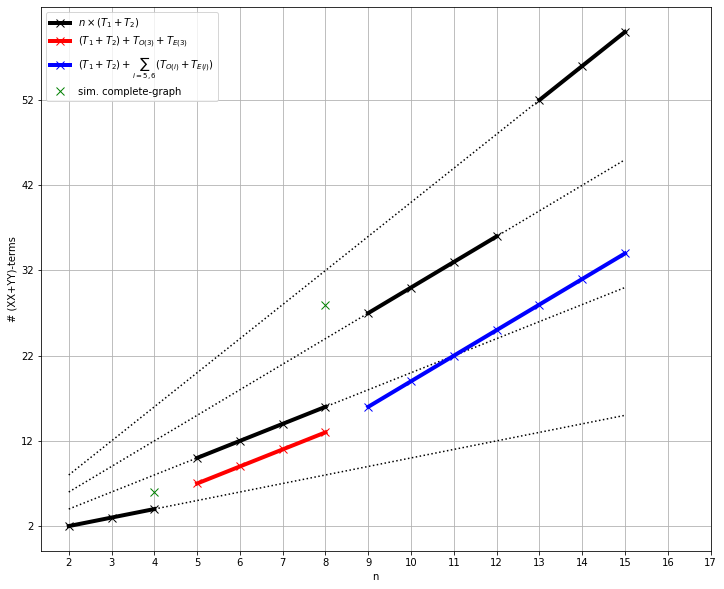

In [163]:
import numpy as np
y={}
ma=16
y[1]=np.zeros(ma)
y[11]=np.zeros(ma)
y[111]=np.zeros(ma)
y[1111]=np.zeros(ma)
y[13]=np.zeros(ma)
y[14]=np.zeros(ma)
y[135]=np.zeros(ma)
y[156]=np.zeros(ma)
y[147]=np.zeros(ma)

ns=range(2,2+ma)
for n in ns:
#     x=[]
    y[1][n-2]=n
    y[11][n-2]=2*n
    y[111][n-2]=3*n
    y[1111][n-2]=4*n
    if n>4:
        y[13][n-2]=n+(n-3)
    if n>5:
        y[14][n-2]=n+(n-4)
    if n>6:
        y[135][n-2]=n+(n-3)+(n-5)
    if n>7:
        y[156][n-2]=n+(n-5)+(n-6)
    if n>8:
        y[147][n-2]=n+(n-4)+(n-7)
#     for d in [1,3,4,5,6,7]:
#         x.append(n-d)
#     print(n,x)


pl.figure(figsize=(12,10))
#1 time
pl.plot(range(2,ma),range(2,ma),'k:')
pl.plot(range(2,5),range(2,5),'xk-',linewidth=4,markersize=8)
#2 times
pl.plot(range(2,ma),2*np.arange(2,ma),'k:')
pl.plot(range(5,9),2*np.arange(5,9),'xk-',linewidth=4,markersize=8)
# pl.plot(range(8,ma),2*np.arange(8,ma),'xk:')
#3 times
pl.plot(range(2,ma),3*np.arange(2,ma),'k:')
pl.plot(range(9,13),3*np.arange(9,13),'xk-',linewidth=4,markersize=8)
# pl.plot(range(12,ma),3*np.arange(12,ma),'xk:')
#4 times
pl.plot(range(2,ma),4*np.arange(2,ma),'k:')
pl.plot(range(13,ma),4*np.arange(13,ma),'xk-',label=r'$n\times(T_1+T_2)$',linewidth=4,markersize=8)

#+3
tmp=np.arange(5,9)
pl.plot(tmp,2*tmp-3,'rx-',label=r'$(T_1+T_2)+T_{O(3)}+T_{E(3)}$',linewidth=4,markersize=8)
tmp=np.arange(8,ma)
# pl.plot(tmp,2*tmp-3,'rx:')

#+5+6
tmp=np.arange(9,ma)
pl.plot(tmp,3*tmp-11,'bx-',label=r'$(T_1+T_2)+\sum_{i=5,6}(T_{O(i)}+T_{E(i)})$',linewidth=4,markersize=8)
tmp=np.arange(8,ma)
# pl.plot(tmp,2*tmp-3,'rx:')

pl.plot([4,8],[6,28],'gx',label='sim. complete-graph',linewidth=4,markersize=8)

# pl.plot(range(12,ma),3*np.arange(12,ma),'xk:')
# for items in y:
#     print(items, y[items])
#     if items==1 or items==11 or items==111 or items==1111:
#         pl.plot(ns,y[items],'-kx',label=str(items))
#     else:
#         pl.plot(ns,y[items],label=str(items))
# # print(y)
pl.legend(loc=2)
pl.grid()
_=pl.xticks(ns)
_=pl.yticks(range(2,60,10))
pl.xlabel("n")
pl.ylabel("# (XX+YY)-terms")
# pl.title("all have linear depth, number of XX+YY terms, so cost is 4 times as much")
tikzplotlib.save("onehot_Trotterizations.tex")

In [164]:
pl.figure()
for n in range(5,16):
    print()
    print("--------")
    print(n)

    yesno={}
    yesno["oe1"]=np.zeros((n, n), dtype=bool)
    yesno["oeoe1"]=np.zeros((n, n), dtype=bool)
    yesno["oeoeoe1"]=np.zeros((n, n), dtype=bool)
#     yesno["oeoeoeoe1"]=np.zeros((n, n), dtype=bool)

    T_tmp={}
    for oe in ["odd", "even"]:
        T_tmp[oe+str(1)]=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
    
    T=np.zeros((n,n))
    for oe in ["odd", "even"]:
        T+=T_tmp[oe+str(1)]
    display(T)
    
    if True:
    
        for p1 in range(n+1):
            for p2 in range(n+1):
                T12=np.matmul(np.linalg.matrix_power(T_tmp["odd1"],p1),np.linalg.matrix_power(T_tmp["even1"],p2))
                yesno["oe1"]=yesno["oe1"] | (T12>0)
                for p3 in range(n+1):
                    for p4 in range(n+1):
                        T1234=np.matmul(T12,np.linalg.matrix_power(T_tmp["odd1"],p3))
                        T1234=np.matmul(T1234,np.linalg.matrix_power(T_tmp["even1"],p4))
                        yesno["oeoe1"]=yesno["oeoe1"] | (T1234>0)
                        for p5 in range(n+1):
                            for p6 in range(n+1):
                                T123456=np.matmul(T1234,np.linalg.matrix_power(T_tmp["odd1"],p5))
                                T123456=np.matmul(T123456,np.linalg.matrix_power(T_tmp["even1"],p6))
                                yesno["oeoeoe1"]=yesno["oeoeoe1"] | (T123456>0)
    #                             for p7 in range(n+1):
    #                                 for p8 in range(n+1):
    #                                     T12345678=np.matmul(T123456,np.linalg.matrix_power(T_tmp["odd1"],p5))
    #                                     T12345687=np.matmul(T12345678,np.linalg.matrix_power(T_tmp["even1"],p6))
    #                                     yesno["oeoeoeoe1"]=yesno["oeoeoeoe1"] | (T12345678>0)

        pl.clf()
        pl.title("T_trotter_oe1_"+str(n))
        pl.imshow(yesno["oe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
        pl.savefig("T_trotter_eo1_"+str(n)+".png")

        pl.clf()
        pl.title("T_trotter_oeoe1_"+str(n))
        pl.imshow(yesno["oeoe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
        pl.savefig("T_trotter_oeoe1_"+str(n)+".png")

        pl.clf()
        pl.title("T_trotter_oeoeoe1_"+str(n))
        pl.imshow(yesno["oeoeoe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
        pl.savefig("T_trotter_oeoeoe1_"+str(n)+".png")

    #     pl.clf()
    #     pl.title("T_trotter_oeoeoeoe1_"+str(n))
    #     pl.imshow(yesno["oeoeoeoe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
    #     pl.savefig("T_trotter_oeoeoeoe1_"+str(n)+".png")


--------
5


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])


--------
6


array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])


--------
7


array([[0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0.]])


--------
8


array([[0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.]])


--------
9


array([[0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
10


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
11


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
12


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
13


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
14


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
15


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.

<Figure size 432x288 with 0 Axes>

In [55]:
T=get_T(5,mode="nearest_int_cyclic")
T=get_T(5,mode="nearest_int",shift=3)
# T=get_T(5,mode="leftright",i=0,j=3)
# T=get_T(5,mode="leftright",i=1,j=4)
T

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
pl.figure()

for idonotmatter in range(3):
    if idonotmatter==0:
        shifts=[3,5]
    elif idonotmatter==1:
        shifts=[3,6]
    elif idonotmatter==2:
        shifts=[4,6]

    for n in range(5,16):
        print()
        print("--------")
        print(n)


        yesno={}
        yesno["oe1"+str(shifts[0])]=np.zeros((n, n), dtype=bool)
        yesno["oe1"+str(shifts[0])+str(shifts[1])]=np.zeros((n, n), dtype=bool)

        T_tmp={}
        for oe in ["odd", "even"]:
            T_tmp[oe+str(1)]=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
        for s in shifts:
            for oe in ["odd", "even"]:
                T_tmp[oe+str(s)]=get_T(n,mode="nearest_int",shift=s,oddeven=oe)

        T=np.zeros((n,n))
        for oe in ["odd", "even"]:
            T+=T_tmp[oe+str(1)]
        for s in shifts:
            for oe in ["odd", "even"]:
                T+=T_tmp[oe+str(s)]
        display(shifts,T)

        if False:
            for p1 in range(n+1):
                for p2 in range(n+1):
                    T12=np.matmul(np.linalg.matrix_power(T_tmp["odd1"],p1),np.linalg.matrix_power(T_tmp["even1"],p2))
                    for p3 in range(n+1):
                        for p4 in range(n+1):
                            T1234=np.matmul(T12,np.linalg.matrix_power(T_tmp["odd"+str(shifts[0])],p3))
                            T1234=np.matmul(T1234,np.linalg.matrix_power(T_tmp["even"+str(shifts[0])],p4))
                            yesno["oe1"+str(shifts[0])]=yesno["oe1"+str(shifts[0])] | (T1234>0)
                            for p5 in range(n+1):
                                for p6 in range(n+1):
                                    T123456=np.matmul(T1234,np.linalg.matrix_power(T_tmp["odd"+str(shifts[1])],p5))
                                    T123456=np.matmul(T123456,np.linalg.matrix_power(T_tmp["even"+str(shifts[1])],p6))
                                    yesno["oe1"+str(shifts[0])+str(shifts[1])]=yesno["oe1"+str(shifts[0])+str(shifts[1])] | (T123456>0)

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+"_"+str(n)+".png")

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])+str(shifts[1])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n)+".png")

In [165]:
pl.figure()

for idonotmatter in range(3):
    if idonotmatter==0:
        shifts=[3,5]
    elif idonotmatter==1:
        shifts=[3,6]
    elif idonotmatter==2:
        shifts=[4,6]

    for n in range(2,5):
        print()
        print("--------")
        print(n)


        yesno={}
        yesno["oe1"+str(shifts[0])]=np.zeros((n, n), dtype=bool)
        yesno["oe1"+str(shifts[0])+str(shifts[1])]=np.zeros((n, n), dtype=bool)

        T_tmp={}
        for oe in ["odd", "even"]:
            T_tmp[oe+str(1)]=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
        for s in shifts:
            for oe in ["odd", "even"]:
                T_tmp[oe+str(s)]=get_T(n,mode="nearest_int",shift=s,oddeven=oe)

        T=np.zeros((n,n))
        for oe in ["odd", "even"]:
            T+=T_tmp[oe+str(1)]
        for s in shifts:
            for oe in ["odd", "even"]:
                T+=T_tmp[oe+str(s)]
        display(shifts,T)

        if False:
            for p1 in range(n+1):
                for p2 in range(n+1):
                    T12=np.matmul(np.linalg.matrix_power(T_tmp["odd1"],p1),np.linalg.matrix_power(T_tmp["even1"],p2))
                    for p3 in range(n+1):
                        for p4 in range(n+1):
                            T1234=np.matmul(T12,np.linalg.matrix_power(T_tmp["odd"+str(shifts[0])],p3))
                            T1234=np.matmul(T1234,np.linalg.matrix_power(T_tmp["even"+str(shifts[0])],p4))
                            yesno["oe1"+str(shifts[0])]=yesno["oe1"+str(shifts[0])] | (T1234>0)
                            for p5 in range(n+1):
                                for p6 in range(n+1):
                                    T123456=np.matmul(T1234,np.linalg.matrix_power(T_tmp["odd"+str(shifts[1])],p5))
                                    T123456=np.matmul(T123456,np.linalg.matrix_power(T_tmp["even"+str(shifts[1])],p6))
                                    yesno["oe1"+str(shifts[0])+str(shifts[1])]=yesno["oe1"+str(shifts[0])+str(shifts[1])] | (T123456>0)

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+"_"+str(n)+".png")

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])+str(shifts[1])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n)+".png")


--------
2


[3, 5]

array([[0., 1.],
       [1., 0.]])


--------
3


[3, 5]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])


--------
4


[3, 5]

array([[0., 1., 0., 2.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [2., 0., 1., 0.]])


--------
2


[3, 6]

array([[0., 1.],
       [1., 0.]])


--------
3


[3, 6]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])


--------
4


[3, 6]

array([[0., 1., 0., 2.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [2., 0., 1., 0.]])


--------
2


[4, 6]

array([[0., 1.],
       [1., 0.]])


--------
3


[4, 6]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])


--------
4


[4, 6]

array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

<Figure size 432x288 with 0 Axes>

In [ ]:
for n in range(3,15):
    T=np.zeros((n,n))
    for oe in ["odd", "even"]:
        T+=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
    for s in range(3,n-1,2):
        print(s)
        for oe in ["odd", "even"]:
            T+=get_T(n,mode="nearest_int",shift=s,oddeven=oe)
    print(T)

In [ ]:
    n=5
    shift=3
    print()
    print("--------")
    print(n)
    
    ind={}
    ind["even"]={}
    ind["odd"]={}

    for a in [0,shift+1]:#,2*shift+1]:
        ind["even"][a]={}
        ind["even"][a]["i"]=[]
        ind["even"][a]["j"]=[]
        ind["odd"][a]={}
        ind["odd"][a]["i"]=[]
        ind["odd"][a]["j"]=[]
        for i in range(a+0,a+n,2):
            if i>=n:
                break
            if a>0:
                j=(i-a)%n
            else:
                j=(i+1)%n
            ind["even"][a]["i"].append(i)
            ind["even"][a]["j"].append(j)
        for i in range(a+1,a+n,2):
            if i>=n:
                break
            if a>0:
                j=(i-a)%n
            else:
                j=(i+1)%n
            ind["odd"][a]["i"].append(i)
            ind["odd"][a]["j"].append(j)

    print(ind)
    
    T_f=np.zeros((n,n))
    T_eo={}
    T_eo["even"]={}
    T_eo["odd"]={}
    for a in [0,shift+1]:#,2*shift+1]:
        T_eo["even"][a]=get_T(mode="leftright",n=n,i=ind["even"][a]["i"],j=ind["even"][a]["j"])
        T_eo["odd"][a]=get_T(mode="leftright",n=n,i=ind["odd"][a]["i"],j=ind["odd"][a]["j"])
        T_f+=T_eo["even"][a]+T_eo["odd"][a]
#     display(T_eo)
    display(T_f)
    
    yesno1=np.zeros((n, n), dtype=bool)
    yesno2=np.zeros((n, n), dtype=bool)
    yesno3=np.zeros((n, n), dtype=bool)

    for p1 in range(n+1):
        for p2 in range(n+1):
            a=0
            T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
            yesno1=yesno1 | (T1>0)
    
    for p1 in range(n+1):
        for p2 in range(n+1):
            for p3 in range(n+1):
                for p4 in range(n+1):
                    a=0
                    T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
                    a=shift+1
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p3))
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p4))
                    yesno2=yesno2 | (T1>0)
    
    for p1 in range(n+1):
        for p2 in range(n+1):
            for p3 in range(n+1):
                for p4 in range(n+1):
                    a=0
                    T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p3))
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p4))
                    yesno3=yesno3 | (T1>0)
    
#     for p1 in range(n+1):
#         for p2 in range(n+1):
#             for p3 in range(n+1):
#                 for p4 in range(n+1):
#                     for p5 in range(n+1):
#                         for p6 in range(n+1):
#                             a=0
#                             T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
#                             a=shift+1
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p3))
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p4))
#                             a=2*shift+1
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p5))
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p6))
#                             yesno3=yesno3 | (T1>0)
    

    print(" even, odd")
    print(yesno1)
    print(" even, odd, even, odd")
    print(yesno3)
    print(" shift")
    print(yesno2)

In [ ]:
pl.figure()
pl.imshow(1-T_f, cmap=pl.cm.gray)

In [ ]:
pl.figure()
pl.imshow(yesno1, cmap=pl.cm.gray)
pl.figure()
pl.imshow(yesno2, cmap=pl.cm.gray)
pl.figure()
pl.imshow(yesno3, cmap=pl.cm.gray)

In [ ]:
tmp=['100','010','001']
tmp_neg=get_bitwise_negated_strings(tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), get_minus(tmp_neg,tmp)

In [ ]:
tmp=['001','111','101']
tmp_neg=get_bitwise_negated_strings(tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), get_minus(tmp_neg,tmp)

In [ ]:
tmp=['100','010','011']
tmp_neg=get_bitwise_negated_strings(tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), get_minus(tmp_neg,tmp)

In [ ]:
tmp=['100','010','001','011']
tmp_neg=get_bitwise_negated_strings(tmp)
minus, m_ind = get_minus(tmp_neg,tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), minus, m_ind

In [ ]:
get_overlap(['1000','0100','0010','0001'],
           ['0101','1001','0110','1010','0111','1011','1100','0000','1111','0011','1101','0001','1110','0010']
           )

In [ ]:
H_12=get_H(['100','010','001'],get_T(3,"leftright",i=0,j=2),simplify=False)
H_12=simplifyH(H_12)
display(H_12)

In [ ]:
H_12=get_H(['11','00'],get_T(2,"nearest_int"),simplify=False)
H_12=simplifyH(H_12)
display(H_12)

In [ ]:
H_12=get_H(['1100','0000'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['1111','0011'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['1101','0001'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['1110','0010'],get_T(2,"nearest_int"),simplify=False)
H_12=simplifyH(H_12)
display(H_12)

In [ ]:
H_12=get_H(['0100','1000'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['0101','1001'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['0110','1010'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['0111','1011'],get_T(2,"nearest_int"),simplify=False)

H_12=simplifyH(H_12)
display(H_12)

In [ ]:
H=get_H(['0100','1000','0010','0001'],get_T(4,"nearest_int"),simplify=False)

H+=get_H(['0101','1001'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['0110','1010'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['0111','1011'],get_T(2,"nearest_int"),simplify=False)

H+=get_H(['1001','0011'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1100','0110'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1101','0111'],get_T(2,"nearest_int"),simplify=False)

H+=get_H(['0110','0101'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1010','1001'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1110','1101'],get_T(2,"nearest_int"),simplify=False)

H=simplifyH(H)
display(H)

In [ ]:
all_states(3)

In [ ]:
a = symbols('a')
b = symbols('b')
c = symbols('c')
T=Matrix(([a,b],[b,c]))
display(T)

get_H(['01','10'],T,symbolic=True)
# print_info2(['01','10'],T)

In [ ]:
T=np.ones((2,2))-np.identity(2)
display(T)

print_info(['01','10'],T)

In [ ]:
T=np.ones((3,3))-2*np.identity(3)
display(T)

print_info(['100','010','001'],T)

T=np.ones((3,3))-np.identity(3)
display(T)

print_info(['100','010','001'],T)

T=np.ones((3,3))-np.identity(3)
T[0,2]=0
T[2,0]=0
display(T)

print_info(['100','010','001'],T)

In [ ]:
T=np.ones((3,3))-np.identity(3)
T[0,2]=0
T[2,0]=0
display(T)

print_info(['100','010','011'],T)
print_info2(['100','010','011'],T)

In [ ]:
# for i in range(3):
#     for j in range(i+1):
#         T=np.zeros((3,3))
#         T[i,j]=1
#         T[j,i]=1
#         display(T)
# #         print_info(['100','010','001'],T,disp_d=False,disp_g=False,disp_neg=False,disp_H=False)
#         print_info2(['100','010','001'],T)

In [ ]:
#     T=np.zeros((2,2))
#     str_lst=['0110','1011']
#     T[0,1]=1
#     T[1,0]=1
#     display(T,str_lst)
#     print_info(str_lst,T)

In [ ]:
    T=np.zeros((2,2))
    T[0,1]=1
    T[1,0]=1
    
    str_lst=['11', '00']
    display(T,str_lst)
    print_info(str_lst,T)
    
    str_lst=['10', '01']
    display(T,str_lst)
    print_info(str_lst,T)

In [ ]:
for n in range(2,10):
    print("----------------------")
    print("")
    
    T=np.zeros((2,2))
    T[0,1]=T[1,0]=1
    
    str_lst=[]
    str_tmp='01'
    for i in range(n-2):
        str_tmp+="1"
    str_lst.append(str_tmp)
    
    str_tmp='10'
    for i in range(n-2):
        str_tmp+="0"
    str_lst.append(str_tmp)
    
    display(T,str_lst)

    H=get_H(str_lst,T,simplify=True)
#     print(2**(n-2))
    display(H)

In [ ]:
for n in [2,3,4,5,6]:
    print("----------------------")
    print("")
    T=np.zeros((n,n))
    str_lst=[]
#     T[0,1]=1
#     T[1,0]=1
    for i in range(n-1):
        T[i,i+1]=1
        T[i+1,i]=1
    for i in range(n):
        str_tmp=''
        for j in range(n):
            if i==j:
                str_tmp+="1"
            else:
                str_tmp+="0"
        str_lst.append(str_tmp)
    display(T,str_lst)

    print_info2(str_lst,T)

In [ ]:
T=np.ones((2,2))-np.identity(2)
# T[2,0]=0
# T[0,2]=0
display(T)

print_info(['100','010'],T)

In [ ]:
T=np.ones((2,2))-np.identity(2)
display(T)
print_info(['001','110'],T)

In [ ]:
T=np.ones((3,3))-np.identity(3)
T[2,0]=0
T[0,2]=0
display(T)

print_info(['001','101','110'],T)

In [ ]:
T=np.ones((3,3))-np.identity(3)
T[2,0]=0
T[0,2]=0
display(T)

print_info(['001','111','101'],T)

In [ ]:
T=np.ones((2,2))-np.identity(2)
display(T)

print_info(['000','111'],T)

In [ ]:
n=2
T=np.zeros((2**n,2**n))
for i in range(2**n-1):
    T[i,i+1]=1
    T[i+1,i]=1
display(T)

print_info(['100','010','001','011'],T)

In [ ]:
import networkx as nx

In [ ]:
def addNode(G,s1,s2,s3=None,i=None):
    found=False
    if s3 is None:
        for u,d in G.nodes(data=True):
            tmp1=(d['list'][0]==s1 and d['list'][1]==s2)
            tmp2=(d['list'][0]==s2 and d['list'][1]==s1)
            if tmp1 or tmp2:
                found=True
                break
        if not found:
            if i is None:
                key=s1+','+s2
                G.add_node(key)
                G.nodes[key]['list']=[s1,s2]
            else:
                G.add_node(i)
                G.nodes[i]['list']=[s1,s2]
    else:
        for u,d in G.nodes(data=True):
            tmp1=(d['list'][0]==s1 and d['list'][1]==s2)
            tmp2=(s2 in d['list'])
            tmp3=(s3 in d['list'])
            if tmp1 or tmp2 or tmp3:
                found=True
                break
        if not found:
            if i is None:
                key=s1+','+s2+','+s3
                G.add_node(key)
                G.nodes[key]['list']=[s1,s2,s3]
            else:
                G.add_node(i)
                G.nodes[i]['list']=[s1,s2,s3]
    return G

def addEdges(G):
    for u1,d1 in G.nodes(data=True):
        for u2,d2 in G.nodes(data=True):
            if not u1==u2:
                if len(get_overlap(d1['list'],d2['list']))>0:
                    G.add_edge(u1,u2)
    return G

def remove(G,keys):
    Gnew = nx.Graph()
    for u,d in G.nodes(data=True):
        found=False
        for key in keys:
            if key in d['list']:
                found=True
                break
        if not found:
            Gnew.add_node(u)
            Gnew.nodes[u]['list']=d['list']
    return Gnew

In [ ]:
B=['100','010']

G = nx.Graph()
i=0
labels=[]
for s1 in all_states(3):
    for s2 in all_states(3):
        if not s1==s2:# or s1==B[0] or s1==B[1] or s2==B[0] or s2==B[1]):
            ol=get_overlap([s1,s2],B)
            print(s1,s2,ol)
            if len(ol)>=0:
                i+=1
                labels.append("{$"+s1+",\!"+s2+"$}")
                G = addNode(G,s1,s2)#,i=i)
GE = addEdges(G)
pos = nx.circular_layout(GE)
# pos = nx.spring_layout(G)
pl.figure(figsize=(10,10))
nx.draw_networkx(GE,pos=pos,with_labels=true,node_size=2500)#, node_color=color_map)

style = {}
style['node_label'] = labels
style['layout']=nx.circular_layout(GE)
style['node_size']=1
style['node_color']="white"

plot(GE,'network.tex',**style)

In [ ]:
G2=remove(G,['100','010','100','011'])
GE = addEdges(G2)

pos = nx.circular_layout(GE)
# pos = nx.spring_layout(G)
pl.figure(figsize=(10,10))
nx.draw_networkx(GE,pos=pos,with_labels=true,node_size=2500)#, node_color=color_map)

In [ ]:
B=['100','010','011']

G = nx.Graph()
i=0
labels=[]
for s1 in all_states(3):
    for s2 in all_states(3):
        ol=get_overlap([s1,s2],B)
        if len(ol)==0:
            if not s1==s2:
                i+=1
                labels.append("{$"+s1+",\!"+s2+"$}")
                G = addNode(G,s1,s2)#,i=i)
GE = addEdges(G)
pos = nx.circular_layout(GE)
# pos = nx.spring_layout(G)
pl.figure(figsize=(10,10))
nx.draw_networkx(GE,pos=pos,with_labels=true,node_size=2500)#, node_color=color_map)

style = {}
style['node_label'] = labels
style['layout']=nx.circular_layout(GE)
style['node_size']=1
style['node_color']="white"

plot(GE,'network.tex',**style)

In [ ]:
# nodes = ['a','b','c','d']
# edges = [('a','b'), ('a','c'), ('c','d'),('d','b')]
# gender = ['f', 'm', 'f', 'm']
# colors = {'m': 'blue', 'f': 'red'}

# style = {}
# style['node_label'] = ['Alice', 'Bob', 'Claire', 'Dennis']
# style['node_color'] = [colors[g] for g in gender]
# style['node_opacity'] = .5
# style['edge_curved'] = .1

# from network2tikz import plot
# plot((nodes,edges),'network.tex',**style)

In [ ]:
G2=remove(G,['110','000'])
GE = addEdges(G2)

pos = nx.circular_layout(GE)
# pos = nx.spring_layout(G)
pl.figure(figsize=(10,10))
nx.draw_networkx(GE,pos=pos,with_labels=true,node_size=2500)#, node_color=color_map)

In [ ]:
# B=['100','010','011']

# G = nx.Graph()
# for s1 in all_states(3):
#     for s2 in all_states(3):
#         for s3 in all_states(3):
#             ol=get_overlap([s1,s2,s3],B)
#             if len(ol)==0:
#                 if not s1==s2:
#                     G = addNode(G,s1,s2,s3)
# GE = addEdges(G)

# pos = nx.circular_layout(GE)
# # pos = nx.spring_layout(G)
# pl.figure(figsize=(10,10))
# nx.draw_networkx(GE,pos=pos,with_labels=true,node_size=2500)#, node_color=color_map)
# # print(GE)

# for u,d in GE.nodes(data=True):
#     display(d)

In [ ]:
def addallNodes(G,n,usei=False):
    if usei:
        for lst in all_states(n):
            key=st
            G.add_node(key)
            G.nodes[key]['list']=[st]
    else:
        i=0
        for lst in all_states(n):
            i+=1
            G.add_node(i)
            G.nodes[i]['list']=[st]
    return G

def addEdgesFor(G,s1,s2):
    for u1,d1 in G.nodes(data=True):
        for u2,d2 in G.nodes(data=True):
            if not u1==u2:
                if len(get_overlap(d1['list'],d2['list']))>0:
                    G.add_edge(u1,u2)
    return G

def remove(G,keys):
    Gnew = nx.Graph()
    for u,d in G.nodes(data=True):
        found=False
        for key in keys:
            if key in d['list']:
                found=True
                break
        if not found:
            Gnew.add_node(u)
            Gnew.nodes[u]['list']=d['list']
    return Gnew

In [ ]:
# B=['100','010','011']

# G= nx.Graph()
# for s1 in all_states(3):
#     for s2 in all_states(3):
#         ol=get_overlap([s1,s2],B)
#         if len(ol)==0:
#             if not s1==s2:
#                 G = addNode(G,s1,s2)
# # G = addNode(G,'000','001')
# # G = addNode(G,'001','101')
# G1 = addEdges(G,key='000')
# pos = nx.circular_layout(G1)
# # pos = nx.spring_layout(G)
# pl.figure(figsize=(10,10))
# nx.draw_networkx(G1,pos=pos,with_labels=true,node_size=2500,node_color="tab:blue")

In [ ]:
T=get_T(3,mode="nearest_int")
display(T)

B=['100','010','011']
C1=['110','000']
C2=['101','011']

# G = nx.Graph()
# uniquepairs={}
# for s1 in all_states(3):
#     for s2 in all_states(3):
#         if not s1==s2:
#             ol=get_overlap([s1,s2],B)
#             if len(ol)==0:
#                 if not bool(uniquepairs):
#                     uniquepairs
# #                 display("no=",[s1,s2])

display(get_overlap(B,C1))
display(get_overlap(B,C2))        
HB=get_H(B,T)
HC1=get_H(C1,T)
HC2=get_H(C2,T)
HBC1=simplifyH(HB+HC1)
HBC2=simplifyH(HB+HC2)
HBC12=simplifyH(HB+HC1+HC2)

display(HB)
display(num_Cnot(HB))
# print()
# display(HC1)
# display(num_Cnot(HC1))
print("+C1")
display(HBC1)
display(num_Cnot(HBC1))

print("+C2")
display(HBC2)
display(num_Cnot(HBC2))

print()
display(HBC12)
display(num_Cnot(HBC12))

In [ ]:
B=['100','010','011']
for mode in ["nearest_int", "nearest_int_cyclic"]:
    T=get_T(3,mode=mode)
    display(T)

    HB=get_H(B,T)
    HB=simplifyH(HB)
    display(HtoString(HB))
    display(num_Cnot(HB))

    HS=HB
    Htest=HB

    als=all_states(3)

    pair={}
    for i in range(2**3):
        s1=als[i]
        for j in range(i+1,2**3):
            s2=als[j]
            C1=[s1,s2]
            ol=get_overlap(C1,B)
            if len(ol)==0:
                print("")
                HC1=get_H(C1,T)
                HS+=HC1
                HBC1=simplifyH(HB+HC1)
                print(C1)
                display(HtoString(HBC1))
                display(num_Cnot(HBC1))
                pair[s1+","+s2]=num_Cnot(HBC1)[1]
                if num_Cnot(HBC1)==14:
                    Htest+=HC1

    HBS=simplifyH(HS)
    display(HBS)
    display(num_Cnot(HBS))

#     HBt=simplifyH(Htest)
#     display(HBt)
#     display(num_Cnot(HBt))
    print("\n",mode,pair.keys(),pair.values())

In [174]:
def get_Cs(B):
    n=len(B[0])
    m=len(B)
    Cs=[]
    als=all_states(n)
    for i in range(2**n):
        s1=als[i]
        for j in range(i+1,2**n):
            s2=als[j]
            C1=[s1,s2]
            ol=get_overlap(C1,B)
            if len(ol)==0:
                Cs.append(C1)
    return Cs

def analyzeAdding(Cs,B,Tall=False):
    n=len(B[0])
    m=len(B)

    Hs={}
    HSs={}
    Cnots={}

    if Tall:
        for indi in range(m):
            for indj in range(indi+1,m):
                ind=str(indi)+","+str(indj)
                Hs[ind]={}
                HSs[ind]={}
                Cnots[ind]={}

                T=get_T(len(B),mode="leftright",i=indi,j=indj)
                display(T)

                HB=get_H(B,T)
                Hs[ind]['B']=simplifyH(HB)
                HSs[ind]['B']=HtoString(HB)
                Cnots[ind]['B']=num_Cnot(HB)

                T=get_T(2,mode="nearest_int")


                for C in Cs:
                    s1,s2=C
                    key=s1+","+s2
                    HC=get_H(C,T)
                    Hadd=simplifyH(HB+HC)
                    Hs[ind][key]=Hadd
                    HSs[ind][key]=HtoString(Hadd)
                    Cnots[ind][key]=num_Cnot(Hadd)
        
    else:
        for indi in range(m):
            Hs[indi]={}
            HSs[indi]={}
            Cnots[indi]={}

            T=get_T(len(B),mode="leftright",i=indi,j=(indi+1)%len(B))
            display(T)

            HB=get_H(B,T)
            Hs[indi]['B']=simplifyH(HB)
            HSs[indi]['B']=HtoString(HB)
            Cnots[indi]['B']=num_Cnot(HB)

            T=get_T(2,mode="nearest_int")


            for C in Cs:
                s1,s2=C
                key=s1+","+s2
                HC=get_H(C,T)
                Hadd=simplifyH(HB+HC)
                Hs[indi][key]=Hadd
                HSs[indi][key]=HtoString(Hadd)
                Cnots[indi][key]=num_Cnot(Hadd)
        if m>4:
            for indi in [m,m+1]:
                print(indi)
                Hs[indi]={}
                HSs[indi]={}
                Cnots[indi]={}

                T=get_T(len(B),mode="leftright",i=indi-m,j=(indi+4)%len(B))
                display(T)

                HB=get_H(B,T)
                Hs[indi]['B']=simplifyH(HB)
                HSs[indi]['B']=HtoString(HB)
                Cnots[indi]['B']=num_Cnot(HB)

                T=get_T(2,mode="nearest_int")


                for C in Cs:
                    s1,s2=C
                    key=s1+","+s2
                    HC=get_H(C,T)
                    Hadd=simplifyH(HB+HC)
                    Hs[indi][key]=Hadd
                    HSs[indi][key]=HtoString(Hadd)
                    Cnots[indi][key]=num_Cnot(Hadd)
        
    return Hs, HSs, Cnots

# Case 1

In [137]:
B=['100','010','011']
Cs=get_Cs(B)
Hs, HSs, Cnots=analyzeAdding(Cs,B)
display(Cs)

n=len(B[0])
m=len(B)
for key in Hs[0]:
    tmps=key
    for indi in range(m):
        tmps+=" & " + str(Cnots[indi][key][1])
    tmps+="\\\\"
    print(tmps)
HcapB=2**n-m
display(len(Cs),HcapB,math.factorial(HcapB)/(2*math.factorial(HcapB-2)))

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

array([[0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

[['000', '001'],
 ['000', '101'],
 ['000', '110'],
 ['000', '111'],
 ['001', '101'],
 ['001', '110'],
 ['001', '111'],
 ['101', '110'],
 ['101', '111'],
 ['110', '111']]

10

5

10.0

In [21]:
display(HSs)

{0: {'B': '+0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ ',
  '000,001': '+0.25 IIX +0.25 IZX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZZX ',
  '000,101': '+0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ -0.25 YIY -0.25 YZY ',
  '000,110': '+0.50 XXI +0.50 XXZ ',
  '000,111': '+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YYI +0.25 YYZ -0.25 XYY -0.25 YXY -0.25 YYX ',
  '001,101': '+0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ -0.25 XIZ -0.25 XZZ ',
  '001,110': '+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XYY +0.25 YXY +0.25 YYI +0.25 YYZ -0.25 YYX ',
  '001,111': '+0.50 XXI +0.50 YYZ ',
  '101,110': '+0.25 IXX +0.25 IYY +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ -0.25 ZXX -0.25 ZYY ',
  '101,111': '+0.25 IXI +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZXZ -0.25 IXZ -0.25 ZXI ',
  '110,111': '+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZZX -0.25 IZX -0.25 ZIX '},
 1: {'B': '+0.25 IIX +0.25 ZIX -0.25 IZX -0.25 ZZX ',
  '000,001': '+0.50 IIX +0.50 ZIX ',
  '0

# Case 2

In [156]:
B=['10010','01110','10011','11101','00110','01010']
Cs=get_Cs(B)
Hs, HSs, Cnots=analyzeAdding(Cs,B)
display(Cs)

n=len(B[0])
m=len(B)
mini=np.zeros(m+2)
maxi=np.zeros(m+2)
for indi in range(m+2):
    mini[indi] = Cnots[indi]['B'][1]
    maxi[indi] = Cnots[indi]['B'][1]

for key in Hs[0]:
    for indi in range(m+2):
        val=Cnots[indi][key][1]
        mini[indi]=min(val,mini[indi])
        maxi[indi]=max(val,maxi[indi])
print(mini)
print(maxi)
HcapB=2**n-m
display(len(Cs),HcapB,math.factorial(HcapB)/(2*math.factorial(HcapB-2)))

indch=['B']
for key in Hs[0]:
    for indi in range(m+2):
        val=Cnots[indi][key][1]
        if (mini[indi]==val):
            indch.append(key)
for key in Hs[0]:
    for indi in range(m+2):
        val=Cnots[indi][key][1]
        if (maxi[indi]==val):
            indch.append(key)
            break
    
for key in indch:
    tmps=key
    for indi in range(+2):
        val=Cnots[indi][key][1]
        tmps+=" & " + str(val)
    tmps+="\\\\"
    print(tmps)

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

6


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

7


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

[['00000', '00001'],
 ['00000', '00010'],
 ['00000', '00011'],
 ['00000', '00100'],
 ['00000', '00101'],
 ['00000', '00111'],
 ['00000', '01000'],
 ['00000', '01001'],
 ['00000', '01011'],
 ['00000', '01100'],
 ['00000', '01101'],
 ['00000', '01111'],
 ['00000', '10000'],
 ['00000', '10001'],
 ['00000', '10100'],
 ['00000', '10101'],
 ['00000', '10110'],
 ['00000', '10111'],
 ['00000', '11000'],
 ['00000', '11001'],
 ['00000', '11010'],
 ['00000', '11011'],
 ['00000', '11100'],
 ['00000', '11110'],
 ['00000', '11111'],
 ['00001', '00010'],
 ['00001', '00011'],
 ['00001', '00100'],
 ['00001', '00101'],
 ['00001', '00111'],
 ['00001', '01000'],
 ['00001', '01001'],
 ['00001', '01011'],
 ['00001', '01100'],
 ['00001', '01101'],
 ['00001', '01111'],
 ['00001', '10000'],
 ['00001', '10001'],
 ['00001', '10100'],
 ['00001', '10101'],
 ['00001', '10110'],
 ['00001', '10111'],
 ['00001', '11000'],
 ['00001', '11001'],
 ['00001', '11010'],
 ['00001', '11011'],
 ['00001', '11100'],
 ['00001', '1

[40. 48. 40. 48. 32. 32. 32. 24.]
[224. 240. 224. 240. 208. 208. 208. 192.]


325

26

325.0

B & 96 & 112 & 96 & 112 & 80 & 80 & 80 & 64\\
00010,11001 & 208 & 224 & 208 & 48 & 192 & 192 & 192 & 176\\
00011,01101 & 192 & 208 & 40 & 208 & 176 & 176 & 176 & 160\\
00100,01000 & 176 & 192 & 176 & 192 & 32 & 160 & 160 & 144\\
00100,10000 & 176 & 192 & 176 & 192 & 160 & 160 & 32 & 144\\
00111,01011 & 176 & 192 & 176 & 192 & 32 & 160 & 160 & 144\\
01000,01100 & 160 & 176 & 160 & 176 & 144 & 144 & 144 & 24\\
01000,10000 & 176 & 192 & 176 & 192 & 160 & 32 & 160 & 144\\
01011,01111 & 160 & 176 & 160 & 176 & 144 & 144 & 144 & 24\\
01100,10000 & 40 & 208 & 192 & 208 & 176 & 176 & 176 & 160\\
01100,10001 & 208 & 48 & 208 & 224 & 192 & 192 & 192 & 176\\
10110,11010 & 176 & 192 & 176 & 192 & 32 & 160 & 160 & 144\\
11010,11110 & 160 & 176 & 160 & 176 & 144 & 144 & 144 & 24\\
00000,11111 & 224 & 240 & 224 & 240 & 208 & 208 & 208 & 192\\
00001,11110 & 224 & 240 & 224 & 240 & 208 & 208 & 208 & 192\\
00011,11100 & 224 & 240 & 224 & 240 & 208 & 208 & 208 & 192\\
00100,11011 & 224 & 240 & 224 & 240 

In [192]:
# B=['10010','01110','10011','11101','00110','01010']
# Cs=get_Cs(B)
# Hs, HSs, Cnots=analyzeAdding(Cs,B,Tall=True)
# display(Cs)

n=len(B[0])
m=len(B)
mini={}
maxi={}
for keys  in Cnots:
    mini[keys] = Cnots[keys]['B'][1]
    maxi[keys] = Cnots[keys]['B'][1]

for key in Hs['0,1']:
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        mini[keys]=min(val,mini[keys])
        maxi[keys]=max(val,maxi[keys])
print(mini)
print(maxi)
HcapB=2**n-m
display(len(Cs),HcapB,math.factorial(HcapB)/(2*math.factorial(HcapB-2)))

indch=['B']
for key in Hs['0,1']:
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        if (mini[keys]==val):
            indch.append(key)
for key in Hs['0,1']:
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        if (maxi[keys]==val):
            indch.append(key)
            break
    
for key in indch:
    tmps=key
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        if (mini[keys]==val):
            tmps+=" & \\cellcolor{black!25}" + str(val)
        else:
            tmps+=" & " + str(val)
    tmps+="\\\\"
    print(tmps)

{'0,1': 40, '0,2': 24, '0,3': 48, '0,4': 32, '0,5': 32, '1,2': 48, '1,3': 48, '1,4': 24, '1,5': 24, '2,3': 40, '2,4': 40, '2,5': 40, '3,4': 48, '3,5': 48, '4,5': 32}
{'0,1': 224, '0,2': 192, '0,3': 240, '0,4': 208, '0,5': 208, '1,2': 240, '1,3': 224, '1,4': 192, '1,5': 192, '2,3': 224, '2,4': 224, '2,5': 224, '3,4': 240, '3,5': 240, '4,5': 208}


325

26

325.0

B & 96 & 64 & 112 & 80 & 80 & 112 & 96 & 64 & 64 & 96 & 96 & 96 & 112 & 112 & 80\\
00010,00011 & 160 & \cellcolor{black!25}24 & 176 & 144 & 144 & 176 & 160 & 128 & 128 & 160 & 160 & 160 & 176 & 176 & 144\\
00010,01101 & 208 & 176 & \cellcolor{black!25}48 & 192 & 192 & 224 & 208 & 176 & 176 & 208 & 208 & 208 & 224 & 224 & 192\\
00010,10001 & 192 & 160 & 208 & 176 & 176 & 208 & \cellcolor{black!25}48 & 160 & 160 & 192 & 192 & 192 & 208 & 208 & 176\\
00010,10101 & 208 & 176 & 224 & 192 & 192 & 224 & 208 & 176 & 176 & 208 & 208 & 208 & 224 & \cellcolor{black!25}48 & 192\\
00010,11001 & 208 & 176 & 224 & 192 & 192 & 224 & 208 & 176 & 176 & 208 & 208 & 208 & \cellcolor{black!25}48 & 224 & 192\\
00011,01101 & 192 & 160 & 208 & 176 & 176 & 208 & 192 & 160 & 160 & \cellcolor{black!25}40 & 192 & 192 & 208 & 208 & 176\\
00011,10000 & 192 & 160 & 208 & 176 & 176 & 208 & \cellcolor{black!25}48 & 160 & 160 & 192 & 192 & 192 & 208 & 208 & 176\\
00100,01000 & 176 & 144 & 192 & 160 & 160 & 192 & 176 & 

In [199]:
Bsum=0
for keys  in Cnots:
    Bsum+=Cnots[keys]['B'][1]
sum(list(mini.values())), Bsum

(568, 1360)

In [162]:
a1=96 + 112 + 96 + 112 + 80 + 80
a2=80 + 64
b1=40+48+40+48+32
b2=32+32+24
2*a1, a1+a2, 2*b1, b1+b2

(1152, 720, 416, 296)

In [ ]:
HSs

In [ ]:
B=['100','010','011']
for mode in ["nearest_int", "nearest_int_cyclic"]:
    T=get_T(3,mode=mode)
       
    HB=get_H(B,T)
    HB=simplifyH(HB)
    display(HtoString(HB))
    display(num_Cnot(HB))


    als=all_states(3)

    pair={}
    for i in range(2**3):
        s1=als[i]
        for j in range(i+1,2**3):
            s2=als[j]
            for k in range(j+1,2**3):
                s3=als[k]
                C1=[s1,s2,s3]
                ol=get_overlap(C1,B)
                if len(ol)==0:
                    print("")
                    HC1=get_H(C1,T)
                    HBC1=simplifyH(HB+HC1)
                    print(C1)
                    display(HtoString(HBC1))
                    display(num_Cnot(HBC1))
                    pair[s1+","+s2+","+s3]=num_Cnot(HBC1)[1]
    print("\n",mode,pair.keys(),pair.values())

In [ ]:
B=['100','010','011']
for mode in ["nearest_int", "nearest_int_cyclic"]:
    T=get_T(4,mode=mode)
       
    HB=get_H(B,T)
    HB=simplifyH(HB)
    display(HtoString(HB))
    display(num_Cnot(HB))


    als=all_states(3)

    pair={}
    for i in range(2**3):
        s1=als[i]
        for j in range(i+1,2**3):
            s2=als[j]
            for k in range(j+1,2**3):
                s3=als[k]
                for l in range(k+1,2**3):
                    s4=als[l]
                    C1=[s1,s2,s3,s4]
                    ol=get_overlap(C1,B)
                    if len(ol)==0:
                        print("")
                        HC1=get_H(C1,T)
                        HBC1=simplifyH(HB+HC1)
                        print(C1)
                        display(HtoString(HBC1))
                        display(num_Cnot(HBC1))
                        pair[s1+","+s2+","+s3+","+s4]=num_Cnot(HBC1)[1]
    print("\n",mode,pair.keys(),pair.values())

In [1]:
def scost(l,n):
    if n<2 or l>n:
        return 0
    if n==2:
        if l==2:
            return l
        else:
            return 0
    else:
        return scost(l,n-1)+scost(l-1,n-1)
ls=''
for n in range(2,16):
    cost=0
    for l in range(2,n+1):
        cost+=2*(l-1)*scost(l,n)
    ls+="& "+str(cost)
    print("cost(",n,")=",cost)
print(ls)

# ls=''
# for n in range(2,16):
#     cost=0
#     for l in range(2,n+1):
#         cost+=2*(l-1)*math.comb(l,n)
#     ls+="& "+str(cost)
#     print("cost(",n,")=",cost)
# print(ls)

cost( 2 )= 4
cost( 3 )= 12
cost( 4 )= 32
cost( 5 )= 80
cost( 6 )= 192
cost( 7 )= 448
cost( 8 )= 1024
cost( 9 )= 2304
cost( 10 )= 5120
cost( 11 )= 11264
cost( 12 )= 24576
cost( 13 )= 53248
cost( 14 )= 114688
cost( 15 )= 245760
& 4& 12& 32& 80& 192& 448& 1024& 2304& 5120& 11264& 24576& 53248& 114688& 245760


In [ ]:
s=0
for n in range(1,8):
    T1=get_T(2**n,mode='standard',d=1)
    for k in range(1,10):
        Tkm1=get_T(2**n,mode='standard',d=k-1)
        Tk=get_T(2**n,mode='standard',d=k)
        Tkp1=get_T(2**n,mode='standard',d=k+1)
        s+=np.max(np.matmul(Tk,T1)-((n-(k-1))*Tkm1+(k+1)*Tkp1))
display(s)

In [ ]:
for n in range(2,8):
    print("----------------------")
    print("")
    T=np.zeros((2,2))
    T[0,1]=1
    T[1,0]=1
    str_lst=[]
    str_tmp='01'
    for j in range(n-2):
        str_tmp+="0"
    str_lst.append(str_tmp)
    str_tmp='10'
    for j in range(n-2):
        str_tmp+="0"
    str_lst.append(str_tmp)
    display(T,str_lst)

    H=get_H(str_lst,T)
#     display(H)
    H=simplifyH(H)
    num_Cnot(H)